In [209]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Merge data from each month into one CSV

## Step by Step print code in a each block

In [175]:
df = pd.read_csv("./Sales Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Read all file from Sales Data Folder

In [176]:
df = pd.read_csv("./Sales Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales Data')] # Read all file from Sales Data Folder
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


### All file concatenate in one file

In [177]:
files = [file for file in os.listdir('./Sales Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("All_Data.csv", index = False)

In [178]:
All_Data = pd.read_csv("./All_Data.csv")
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the data!

#### Drop rows of NAN

In [179]:
# Find NAN
nan_df = All_Data[All_Data.isna().any(axis=1)]
nan_df.head()

# All_Data = All_Data.dropna(how='all')
# All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Remove Nan

In [180]:
nan_df = All_Data[All_Data.isna().any(axis=1)]
nan_df.head()

All_Data = All_Data.dropna(how='all')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find "or" and delete it

In [181]:
temp_df = All_Data[All_Data["Order Date"].str[0:2] == 'Or']
temp_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Remove "Or"

In [182]:
All_Data = All_Data[All_Data["Order Date"].str[0:2] != 'Or']
All_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Make columns correct type

### This code is worked for sale column

In [183]:
All_Data["Quantity Ordered"] = pd.to_numeric(All_Data["Quantity Ordered"])
All_Data["Price Each"] = pd.to_numeric(All_Data["Price Each"])
All_Data.info()
All_Data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns


### Add month column

#### this error occurc (cannot convert float NaN to integer)

First we remove this error (cannot convert float NaN to integer)

In [129]:
# Error occur so first we find nan values and vanished it from data
# In above write a code to drop all nan values

All_Data["Months"] = All_Data["Order Date"].str[0:2] # month is present is str
All_Data["Months"] = All_Data["Months"].astype('int32')
All_Data.head()

ValueError: cannot convert float NaN to integer

### After Removing we get this error (invalid literal for int() with base 10: 'Or)

In [132]:
# Error occur so first we find nan values and vanished it from data
# In above write a code to drop all nan values

All_Data["Months"] = All_Data["Order Date"].str[0:2] # month is present is str
All_Data["Months"] = All_Data["Months"].astype('int32')
All_Data.head()

ValueError: invalid literal for int() with base 10: 'Or'

## Task 2 Add Month Column

In [184]:
# After removing nan And Or from the data then we get Final DataFrame

All_Data["Months"] = All_Data["Order Date"].str[0:2] # month is present is str
All_Data["Months"] = All_Data["Months"].astype('int32')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add month column (alternative method)

In [156]:
All_Data['Month 2'] = pd.to_datetime(All_Data['Order Date']).dt.month
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


In [157]:
del All_Data['Month 2']

In [158]:
All_Data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


# Task 3 Add Sales Column1

In [61]:
All_Data["Sales"] = All_Data["Quantity Ordered"]*All_Data["Quantity Ordered"]

TypeError: can't multiply sequence by non-int of type 'str'

## this error (can't multiply sequence by non-int of type 'str') occur both column present in string so first we convert into numeric

### Error remove in above code

In [185]:
All_Data["Sales"] = All_Data["Quantity Ordered"]*All_Data["Price Each"]
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Task 4

### Add city column

In [186]:
All_Data["City"] = All_Data["Purchase Address"].apply(lambda x : x.split(",")[1])
All_Data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [187]:
def get_city(adress):
    return adress.split(",")[1]

def get_state(adress):
    return adress.split(",")[2].split(" ")[1]

All_Data["City"] =All_Data["Purchase Address"].apply(lambda x : f"{get_city(x)}  ({ get_state(x)})")


All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [188]:
def get_city(adress):
    return adress.split(",")[1]

def get_state(adress):
    return adress.split(",")[2].split(" ")[1]

All_Data["City"] = All_Data["Purchase Address"].apply(lambda x : f"{get_city(x)}  ({ get_state(x)})")


All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Data Exploration!

## Question 1: What was the best month for sales? How much was earned that month?

In [189]:
All_Data['Sales'] = All_Data['Quantity Ordered'].astype('int') * All_Data['Price Each'].astype('float')
All_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [190]:
All_Data.groupby(['Months']).sum()

,Quantity Ordered,Price Each,Sales
Months,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [166]:
results = All_Data.groupby(['Months']).sum()


<BarContainer object of 12 artists>

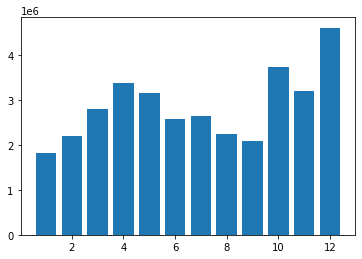

In [191]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])

range(1, 13)


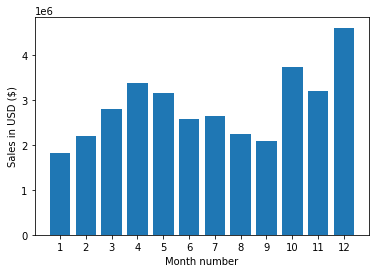

In [192]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city sold the most product?

In [193]:
results1 =All_Data.groupby(['City']).sum()
display(results1)

,Quantity Ordered,Price Each,Months,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


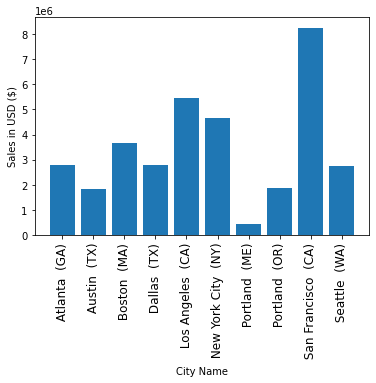

In [196]:
import matplotlib.pyplot as plt

Cities = [city for city,df in All_Data.groupby("City")]

plt.bar(Cities , results1["Sales"])
plt.xticks(Cities , rotation = "vertical" , size= 12)
plt.ylabel('Sales in USD ($)')
plt.xlabel("City Name")
plt.show()

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [211]:
# Add hour column
All_Data['Hour'] = pd.to_datetime(All_Data['Order Date']).dt.hour
All_Data['Minute'] = pd.to_datetime(All_Data['Order Date']).dt.minute
All_Data['Count'] = 1
All_Data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1


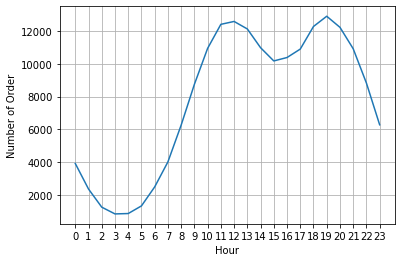

In [222]:
hours = [hour for hour,df in  All_Data.groupby("Hour")]

plt.plot(hours , All_Data.groupby("Hour").count()["Count"])
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Order")
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

## Question 4: What products are most often sold together?

In [228]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = All_Data[All_Data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(50)

C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\3550475995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,1,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,1,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


In [230]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = All_Data[All_Data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(5)

C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\3724973281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [236]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    print(row_list)
#     count.update(Counter(combinations(row_list, 2)))

# for key,value in count.most_common(10):
#     print(key, value)

['Google Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Bose SoundSport Headphones', 'Bose SoundSport Headphones']
['AAA Batteries (4-pack)', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Apple Airpods Headphones', 'ThinkPad Laptop']
['Bose SoundSport Headphones', 'AAA Batteries (4-pack)']
['34in Ultrawide Monitor', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['Google Phone', 'Wired Headphones']
['AAA Batteries (4-pack)', '27in FHD Monitor']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Wired Headphones']
['iPhone', '27in 4K Gaming Monitor']
['iPhone', 'Lightning Charging Cable']
['ThinkPad Laptop', 'AAA Batteries (4-pack)']
['iPhone', 'Apple Ai

['Wired Headphones', 'USB-C Charging Cable']
['USB-C Charging Cable', 'Lightning Charging Cable']
['Macbook Pro Laptop', 'USB-C Charging Cable']
['USB-C Charging Cable', 'Lightning Charging Cable']
['AAA Batteries (4-pack)', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['AA Batteries (4-pack)', 'AA Batteries (4-pack)']
['iPhone', 'Apple Airpods Headphones']
['Apple Airpods Headphones', '27in FHD Monitor']
['Vareebadd Phone', 'Wired Headphones']
['AA Batteries (4-pack)', '27in 4K Gaming Monitor']
['Google Phone', 'USB-C Charging Cable']
['Wired Headphones', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['Vareebadd Phone', 'USB-C Charging Cable']
['AA Batteries (4-pack)', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']
['Apple 

['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']
['iPhone', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['AA Batteries (4-pack)', '27in 4K Gaming Monitor']
['Google Phone', 'Wired Headphones']
['Apple Airpods Headphones', 'AAA Batteries (4-pack)']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Lightning Charging Cable', 'Macbook Pro Laptop']
['27in 4K Gaming Monitor', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones']
['iPhone', 'AAA Batteries (4-pack)']
['Vareebadd Phone', 'Bose SoundSport Headphones']
['AAA Batteries (4-pack)', 'Lightning Charging Cable']
['20in Monitor', 'Wired Headphones']
['iPhone', 'Apple Ai

['Google Phone', 'USB-C Charging Cable']
['Wired Headphones', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['Macbook Pro Laptop', 'AA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Apple Airpods Headphones']
['Flatscreen TV', 'AA Batteries (4-pack)']
['USB-C Charging Cable', 'Wired Headphones']
['AA Batteries (4-pack)', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']
['Bose SoundSport Headphones', 'ThinkPad Laptop']
['Wired Headphones', 'Apple Airpods Headphones']
['iPhone', 'Apple Airpods Headphones']
['iPhone', 'Lightning Charging Cable']
['Bose SoundSport Headphones', '27in FHD Monitor']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['Apple Airpods Headphones', 'AAA Batteries (4-pack)']
['Google Phone', 'Bose SoundSport Headphones']
['iPhone', 'Lightning Charging Cable', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging

['USB-C Charging Cable', 'AA Batteries (4-pack)']
['34in Ultrawide Monitor', 'AA Batteries (4-pack)']
['Google Phone', 'Wired Headphones']
['iPhone', 'Apple Airpods Headphones']
['USB-C Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Wired Headphones']
['Google Phone', 'Bose SoundSport Headphones']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['Lightning Charging Cable', 'Flatscreen TV']
['Google Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['iPhone', 'Wired Headphones']
['AAA Batteries (4-pack)', 'iPhone']
['Google Phone', 'USB-C Charging Cable']
['USB-C Charging Cable', 'Bose SoundSport Headphones']
['Bose SoundSport Headphones', '34in Ultrawide Monitor']
['Google Phone', 'Bose SoundSport Headphones']
['iPhone', 'Lightning Charging Cable']
['USB-C Charging Cable', 'Apple Airpods Headphones']
['

In [238]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5 :What product sold the most? Why do you think it sold the most?

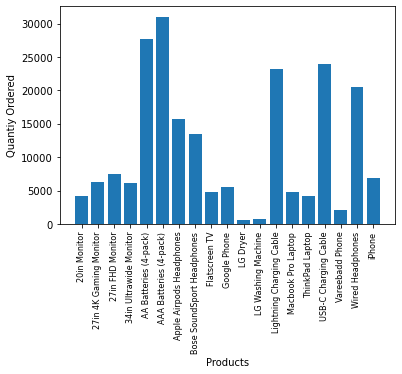

In [242]:
product_group = All_Data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel("Products")
plt.ylabel("Quantiy Ordered")
plt.show()

In [250]:
prices = prices =All_Data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\3475112368.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\3475112368.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


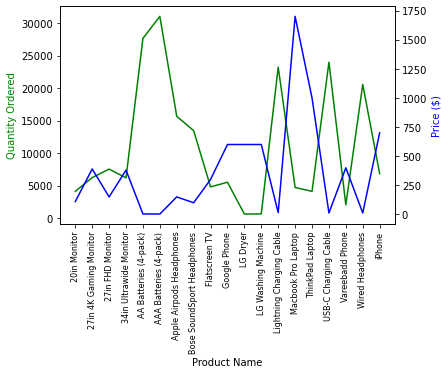

In [251]:
prices =All_Data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\968364697.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Qazi Moawiz\AppData\Local\Temp\ipykernel_3212\968364697.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


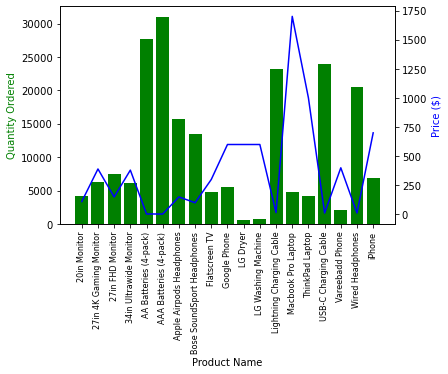

In [253]:
prices =All_Data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()